The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

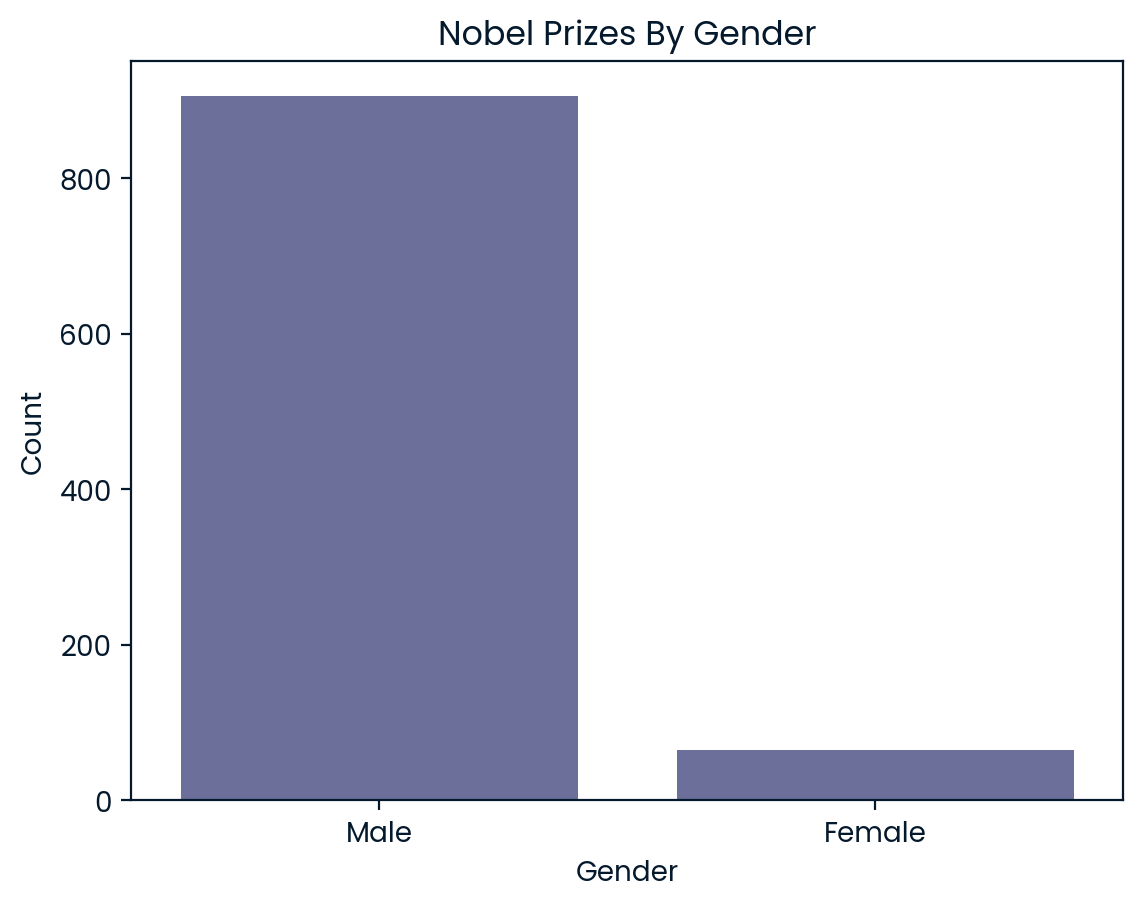

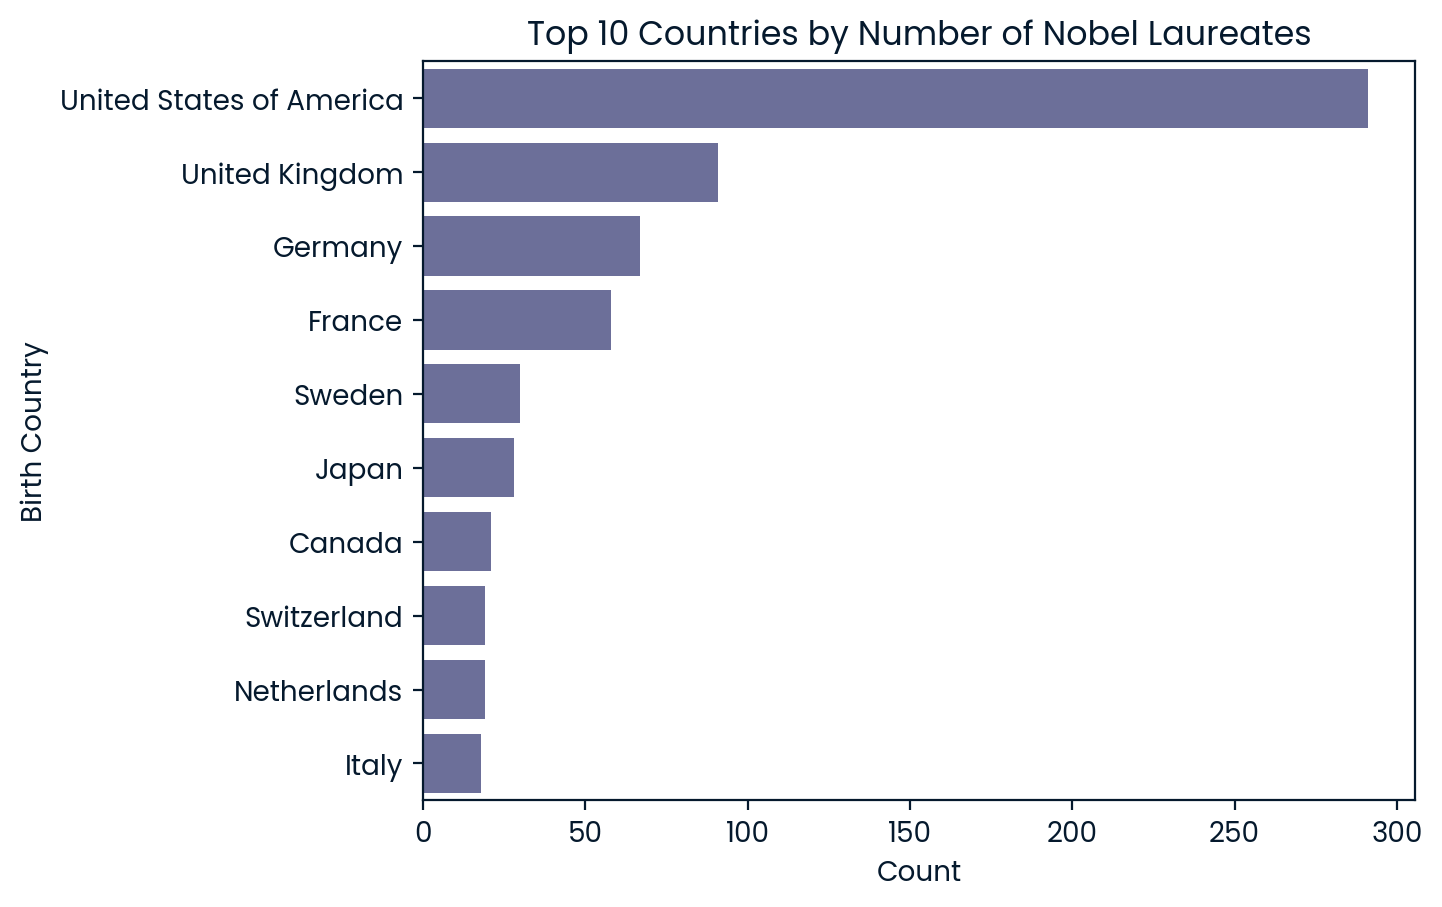

Most common gender: Male
Most common birth country: United States of America


In [14]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd

# Update the path to the CSV file
nobel = pd.read_csv('data/nobel.csv')

#Gender Frequencies 
gender_counts=nobel['sex'].value_counts()
top_gender = str(nobel['sex'].value_counts().index[0])
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Nobel Prizes By Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#Country Frequencies
country_counts = nobel['birth_country'].value_counts().head(10)
top_country = str(nobel['birth_country'].value_counts().index[0])
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title('Top 10 Countries by Number of Nobel Laureates')
plt.xlabel('Count')
plt.ylabel('Birth Country')
plt.show()

print(f"Most common gender: {top_gender}")
print(f"Most common birth country: {top_country}")



In [15]:
#Decade Column
nobel['decade'] = (nobel['year'] // 10) * 10
#US Winners by decade 
total_by_decade = nobel.groupby('decade').size()
usa_by_decade = nobel[nobel['birth_country'] == 'United States of America'].groupby('decade').size()
#US born winners to total winners
usa_ratio = (usa_by_decade / total_by_decade)
#Decade
max_decade_usa = int(usa_ratio.idxmax())
#Results
print("\nRatios by decade:")
print(usa_ratio)
print(f"\nDecade with highest USA ratio: {max_decade_usa}")


Ratios by decade:
decade
1900    0.017544
1910    0.075000
1920    0.074074
1930    0.250000
1940    0.302326
1950    0.291667
1960    0.265823
1970    0.317308
1980    0.319588
1990    0.403846
2000    0.422764
2010    0.314050
2020    0.360000
dtype: float64

Decade with highest USA ratio: 2000


In [16]:
import pandas as pd
df = pd.read_csv('data/nobel.csv')
#decade column
df['decade']=(df['year']//10)*10
female_props=df.groupby(['decade','category']).agg(
    female_count=('sex', lambda x: (x == 'Female').sum()),
    total_count=('sex', 'count')
)
female_props['proportion'] = female_props['female_count'] / female_props['total_count']
#2020 decade
max_prop_2020 = female_props.loc[2020]['proportion'].max()
max_category_2020 = female_props.loc[2020]['proportion'].idxmax()
max_female_dict = {2020: 'Literature'}
#print
print(max_female_dict)


{2020: 'Literature'}


In [17]:
import pandas as pd 
df=pd.read_csv('data/nobel.csv')
#female and year
female_df=df[df['sex']=='Female'].sort_values('year')
#first women info
first_woman = female_df.iloc[0]
#categories
first_woman_name=first_woman['full_name']
first_woman_category=first_woman['category']
#print
print(f"First woman: {first_woman_name}")
print(f"Category: {first_woman_category}")

First woman: Marie Curie, née Sklodowska
Category: Physics


In [18]:
import pandas as pd
df=pd.read_csv('data/nobel.csv')
#full name occurances and more than 1
prize_name=df['full_name'].value_counts()
repeats=prize_name[prize_name>1]
#repeat list 
repeat_list = repeats.index.tolist()
#print
print("People/organizations who won multiple times:")
print(repeat_list)

People/organizations who won multiple times:
['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
